# 两个基本概念
* 线性可分 Linear Separable
* 线性不可分 Nonlinear Separable

超过3维时的平面叫做**超平面 Hyperplane**



# 用数学严格定义训练样本以及标签
**假设**：  
有 N 个训练样本和他们的标签  
$\{(X_1, y_1), (X_2, y_2),\dots,(X_N, y_N)\}$  
其中, $X_i$ 是一个向量，包括各个维度方向上的值，$y_i$ 是一个标量，值为 +1 时表示一个类别，值为 -1 时表示另一个类别，这些都是人为规定的  
$X_i = [x_{i1}, x_{i2}]^T$  
$y_i = \{+1, -1\}$

# 用数学严格的定义线性可分
线性可分的严格定义：一个训练样本集 $\{(X_i, y_i),\dots,(x_N, y_N)\}$，在 $i = 1 ~ N$ 线性可分，是指存在 $(\omega_1, \omega_2, b)$，使得对 $i = 1 ~ N$，有：
1. 若 $y_i = +1$，则 $\omega_1x_{i1} + \omega_2x_{i2} + b > 0$
2. 若 $y_i = -1$，则 $\omega_1x_{i1} + \omega_2x_{i2} + b < 0$

# 用向量形式来定义线性可分
假设：  
${\begin{aligned}X_i = \begin{bmatrix} x_{i1}\\x_{i2} \end{bmatrix}\end{aligned}}^T     {\begin{aligned}\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \end{bmatrix} \end{aligned}}^T$ 
1. 若 $y_i = +1$，则 $\omega^Tx_{i} + b > 0$
2. 若 $y_i = -1$，则 $\omega^Tx_{i} + b < 0$  
统一这两个情况：  
$y_i（\omega^Tx_{i} + b） > 0$

# 支持向量机 （线性可分）
如果一个样本集是线性可分的，则存在无数个分割线/平面/超平面 

## 优化
将分割线/平面/超平面向两个方向平行移动直到碰到一个或数个样本，再观察两个与样本相交的分隔之间的距离，Margin 越大则越优化，同时该分隔线/平面/超平面离两边的距离应相等

支持向量机寻找的最优分类直线应满足：
1. 该直线分开了两类
2. 该直线最大化**间隔 (Margin)**
3. 该直线处于间隔的中间，到所有支持向量距离相等

支持向量机需要寻找的是最大化**间隔 (Margin)**的超平面  

最小化 (Minimize)，欧米伽膜的平方的一半: $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2$  
限制条件： $y_i(\omega^Tx_i + b) ≥ 1, (i = 1 ~ N)$

### 最小化 (Minimize): $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2$
$\begin{aligned} \omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_m \end{bmatrix} \end{aligned}$  

$\omega$ 是一个向量，包含 m 个分量，即 $\omega_1$ 到 $\omega_m$  

$\begin{Vmatrix}\omega\end{Vmatrix}^2 = \omega_1^2 + \omega_2^2 + \dots + \omega_m^2 = \sum_{i = 1}^{m}{\omega_i^2}$  

定义欧米伽膜的平方按上述方式计算

### 事实1
$\omega^Tx + b = 0$ 与 $(a\omega^T)x + (ab) = 0$ 是同一个超平面。 (a ≠ 0)
### 事实2
一个点 $X_0$ 到超平面 $\omega^Tx + b = 0$ 的距离  

$d = \frac{\begin{vmatrix} \omega^Tx_0 + b \end{vmatrix}}{\begin{Vmatrix} \omega \end{Vmatrix}}$  

在二维平面中，一个点 $(x_0, y_0)$ 到超平面 $\omega_1x_0 + \omega_2y_0 + b = 0$ 的距离：  

$d = \frac{\begin{vmatrix}\omega_1x_0 + \omega_2y_0 + b\end{vmatrix}}{\sqrt{\omega_1^2+\omega_2^2}}$

## 重点理解：
用 $a$ 去缩放 $\omega b$  
$(\omega, b) \rightarrow (a\omega, ab)$
最终使在支持向量 $x_0$ 上有 $\begin{vmatrix} \omega^Tx_0 + b \end{vmatrix} = 1$，  
而在非支持向量上 $\begin{vmatrix} \omega^Tx_0 + b \end{vmatrix} > 1$

$(\omega, b)$ 表示的超平面和 $a(\omega, ab)$ 表示的超平面是同一个平面
根据**事实2**  
$d = \frac{\begin{vmatrix} \omega^Tx_0 + b \end{vmatrix}}{\begin{Vmatrix} \omega \end{Vmatrix}} = \frac{1}{\begin{Vmatrix} \omega \end{Vmatrix}}$ 

要最大化支持向量到超平面的距离，就是要最小化 $\begin{Vmatrix} \omega \end{Vmatrix}$

之所以写成最小化 (Minimize): $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2$ 是因为之后求导会更方便

线性可分情况下，支持向量机寻找最佳超平面的优化问题可以表示为：

**凸优化 (Convex Optimization)**  

最小化 (Minimize)，欧米伽膜的平方的一半: $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2$  
限制条件： $y_i(\omega^Tx_i + b) ≥ 1, (i = 1 ~ N)$  
$(X_i, y_i), i = 1 ~ N$ 是已知的， $(\omega, b)$ 是待求的

这是凸优化问题中的二次规划问题

### 二次规划的定义
1. **目标函数 (Objedtive Function)** 是二次项
2. **限制条件**是一次项

凸优化问题有唯一一个全局极值

# 支持向量机 （线性不可分）
如果一个样本集是线性不可分的，则不存在无数个分割线/平面/超平面。我们需要适当放松限制条件使之有解

## 优化

对每个训练样本及标签 $(X_i, y_i)$，设置 松弛变量 Slack Variable **$\delta_i$** 

最小化 (Minimize): $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2 + C\sum_{i=1}^N\delta_i$ 或 $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2 + C\sum_{i=1}^N\delta_i^2$  
限制条件：
1. $\delta_i ≥ 0, (i = 1 \sim N)$
2. $y_i(\omega^TX_i + b) ≥ 1-\delta_i, (i = 1 \sim N)$

所以：
1. 和线性可分一样，最小化 $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2$
2. 最小化 $\sum_{i=1}^N\delta_i$

比较：  
线性可分时，目标函数只需要最小化 $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2$  
线性不可分时，增加了意向：所有$\delta_i$的和

比例因子C用来平衡两项，是人为设定的

在一个算法中人为设定的参数叫做**算法的超参数(Hyper Parameter)**

所以在实际操作时，我们会不断变化C的值，同时测试算法的识别率，最后选取使识别率达到最大的超参数C

# 支持向量机（低维到高维的映射）

看下图，在二维平面上不能用一条直线归类

即线性不可分

$\begin{aligned} x_1 = \begin{bmatrix} 0 \\ 0  \end{bmatrix} \end{aligned} \in C_1$  
$\begin{aligned} x_2 = \begin{bmatrix} 1 \\ 1  \end{bmatrix} \end{aligned} \in C_1$  
$\begin{aligned} x_3 = \begin{bmatrix} 1 \\ 0  \end{bmatrix} \end{aligned} \in C_2$  
$\begin{aligned} x_4 = \begin{bmatrix} 0 \\ 1  \end{bmatrix} \end{aligned} \in C_2$

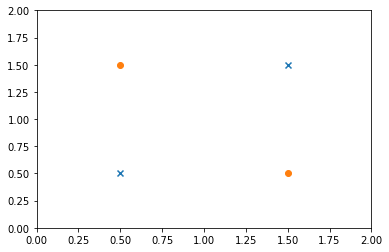

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.array([0.5, 1.5])
xy = np.array([0.5, 1.5])

ox = np.array([0.5, 1.5])
oy = np.array([1.5, 0.5])

plt.scatter(xx, xy, marker='x')
plt.scatter(ox, oy, marker='o')
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.show()

构造一个二维到五维的映射 $\Phi(x)$

$\Phi(x): \begin{aligned} x = \begin{bmatrix} a \\ b \end{bmatrix} \end{aligned} \Rightarrow \begin{aligned} \Phi(x) = \begin{bmatrix} a^2 \\ b^2 \\ a \\ b \\ ab \end{bmatrix} \end{aligned}$

由此映射算出：

$\begin{aligned} \Phi(x_1) = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} \end{aligned}  \begin{aligned} \Phi(x_2) = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} \end{aligned} \begin{aligned} \Phi(x_3) = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \end{aligned} \begin{aligned} \Phi(x_4) = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \\ 0 \end{bmatrix} \end{aligned}$

设：  $\begin{aligned} \omega = \begin{bmatrix} -1 \\ -1 \\ -1 \\ -1 \\ 6 \end{bmatrix} \end{aligned},  b = 1$  
算出：  
$\omega^T\Phi(x_1)+b = 1 ≥ 0$  
$\omega^T\Phi(x_2)+b = 3 ≥ 0$  
$\omega^T\Phi(x_3)+b = -1 < 0$  
$\omega^T\Phi(x_1)+b = -1 < 0$  

假设：在一个**M维空间**上随机取N个训练样本，随机的对每个训练样本赋予标签**+1**或**-1**  
假设：这些训练样本线性可分的概率为P(M)  
则有：当M趋于无穷大时，P(M)=1

## 当$\Phi(x)$已经确定后

最小化 (Minimize): $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2 + C\sum_{i=1}^N\delta_i$ 或 $\frac{1}{2}\begin{Vmatrix}\omega\end{Vmatrix}^2 + C\sum_{i=1}^N\delta_i^2$  
限制条件：
1. $\delta_i ≥ 0, (i = 1 \sim N)$
2. $y_i(\omega^T\Phi(X_i) + b) ≥ 1-\delta_i, (i = 1 \sim N)$



# 支持向量机（核函数的定义）

核函数$\Phi(X)$: Kernel Function

支持向量机的创始人（Vladimir Naumovich Vapnik）指出，我们不用知道 $\Phi(X)$的具体形式

对两个向量，$K(X_1, X_2) = \Phi(X_1)^T\Phi(X_2)$

就可以完成对测试样本的预测。这里$K(X_1, X_2)$是核函数

## 核函数以及低维到高维的映射$\Phi(X)$之间的相互关系。

### 例1：

假设：$\Phi(X)$是一个将**二维向量**映射为**三维向量**的有映射

$X = [x_1, x_2]^T$  
$\phi(X) = \phi([x_1, x_2]^T) = [x_1^2, x_1x_2, x_2^2]$

假设有两个二维向量：  
$X_1 = [x_{11}, x_{12}]^T$ 和 $X_2 = [x_{21}, x_{22}]^T$,

那么  
$K(X_1, X_2) = \phi(X_1)^T\phi(X_2)$  
$            = [x_{11}^2, x_{11}x_{12}, x_{12}^2][x_{21}^2, x_{21}x_{22}, x_{22}^2]^T$  
$            = x_{11}^2x_{21}^2 + x_{11}x_{12}x_{21}x_{22} + x_{12}^2x_{22}^2$

### 例2：

假设有两个二维向量：  
$X_1 = [x_{11}, x_{12}]^T$ 和 $X_2 = [x_{21}, x_{22}]^T$,

假设：  
$K(X_1, X_2) = (x_{11}x_{21} + x_{12}x_{22} + 1)^2$  
$ = x_{11}^2x_{21}^2 + x_{12}^2x_{22}^2 + 1 + 2x_{11}x_{21}x_{12}x_{22} + 2x_{11}x_{21} + 2x_{12}x_{22}$  
$ = \phi(X_1)^T\phi(X_2)$